## 載入模型和權重

In [1]:
import os
import clip
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device = torch.device("cpu")
model, preprocess = clip.load('ViT-B/32', device)

## 載入選擇的圖片

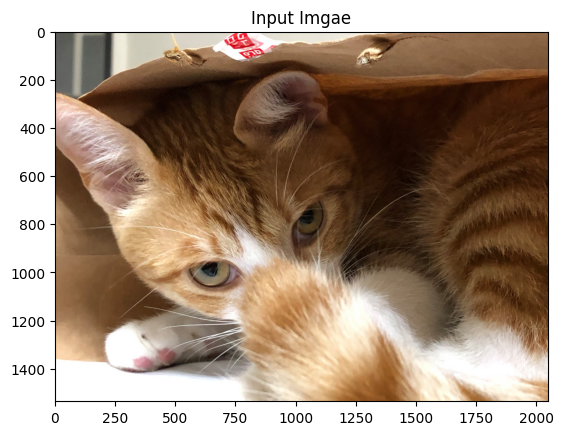

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("cat.jpg")
# image.show()

plt.imshow(image) 
plt.title("Input Imgae")
plt.show()

image_input = preprocess(image).unsqueeze(0).to(device)

## 輸入的不同文字描述

In [3]:
descriptions = ["diagram", "dog", "water", "cat", "paper bag", "cat in a paper bag"]
text_input = clip.tokenize(descriptions).to(device)

## 輸出不同的描述的符合機率

In [4]:
with torch.no_grad():
    logits_per_image, logits_per_text = model(image_input, text_input)
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()[0]
    
for d, p in zip(descriptions, probs):
    print("{:>20s}: {:.2f}%".format(d, p * 100))

             diagram: 0.00%
                 dog: 0.00%
               water: 0.00%
                 cat: 0.04%
           paper bag: 5.62%
  cat in a paper bag: 94.33%
